# Taller de Machine Learning para el Análisis de Datos de Acelerometría

Hoy en día el uso de Ciencia de Datos en diferentes disciplinas es una necesidad/requerimiento. El gran volumen y variedad de los datos obliga a que los especialistas conozcan y manejen herramientas computacionales para el correcto análisis de los datos e interpretación de los resultados.

Importaremos algunas librerías para el análisis preliminar de los datos

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
%matplotlib inline

- Definiremos algunas rutas de trabajo para ubicar los datos

In [3]:
data_dir = '../data/motionsense'
subject_data = 'data_subjects_info.csv'

In [4]:
df = pd.read_csv(os.path.join(data_dir, subject_data))

In [6]:
df.describe()

code      weight      height        age     gender
count  24.000000   24.000000   24.000000  24.000000  24.000000
mean   12.500000   72.125000  174.208333  28.791667   0.583333
std     7.071068   16.211409    8.900313   5.437224   0.503610
min     1.000000   48.000000  161.000000  18.000000   0.000000
25%     6.750000   60.000000  164.750000  25.000000   0.000000
50%    12.500000   71.000000  175.500000  28.000000   1.000000
75%    18.250000   80.500000  180.000000  31.250000   1.000000
max    24.000000  102.000000  190.000000  46.000000   1.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
code      24 non-null int64
weight    24 non-null int64
height    24 non-null int64
age       24 non-null int64
gender    24 non-null int64
dtypes: int64(5)
memory usage: 1.0 KB


In [8]:
df.head(10)

code  weight  height  age  gender
0     1     102     188   46       1
1     2      72     180   28       1
2     3      48     161   28       0
3     4      90     176   31       1
4     5      48     164   23       0
5     6      76     180   28       1
6     7      62     175   30       0
7     8      52     161   24       0
8     9      93     190   32       1
9    10      72     164   31       0

# EDA Datos de Movimiento

La base de datos tiene registros de 6 clases de movimiento.

In [9]:
classes = {'dws': 1,'jog': 2,'sit': 3,'std': 4,'ups': 5,'wlk': 6}
print(classes)

{'dws': 1, 'jog': 2, 'sit': 3, 'std': 4, 'ups': 5, 'wlk': 6}


Sin embargo, las clases registradas tienen una variadad en el largo de las secuencias de muestreo.

In [10]:
dir_list = [c for c in os.listdir(os.path.join(data_dir, 'motion_data'))]
print(dir_list)

['dws_1', 'dws_11', 'dws_2', 'jog_16', 'jog_9', 'sit_13', 'sit_5', 'std_14', 'std_6', 'ups_12', 'ups_3', 'ups_4', 'wlk_15', 'wlk_7', 'wlk_8']


- Visualicemos y verifiquemos el registro para uno de los sujetos en estudio.
- El registro de cada sujeto incluye las medidas de 12 sensores entre acelerómetros y giroscópios.

In [11]:
mot_filename = os.path.join(data_dir, 'motion_data', 'dws_1', 'sub_{}.csv'.format(1))
print(mot_filename)

../data/motionsense\motion_data\dws_1\sub_1.csv


In [12]:
df_mot = pd.read_csv(mot_filename, index_col=0, )

print('Num registros: {} - Num. Medidas: {}'.format(df_mot.shape[0], df_mot.shape[1]))

Num registros: 1751 - Num. Medidas: 12


In [13]:
# Medidas registradas
for f in df_mot.columns:
    print(f)

attitude.roll
attitude.pitch
attitude.yaw
gravity.x
gravity.y
gravity.z
rotationRate.x
rotationRate.y
rotationRate.z
userAcceleration.x
userAcceleration.y
userAcceleration.z


In [14]:
df_mot.head(5)

attitude.roll  attitude.pitch  attitude.yaw  gravity.x  gravity.y  \
0       1.528132       -0.733896      0.696372   0.741895   0.669768   
1       1.527992       -0.716987      0.677762   0.753099   0.657116   
2       1.527765       -0.706999      0.670951   0.759611   0.649555   
3       1.516768       -0.704678      0.675735   0.760709   0.647788   
4       1.493941       -0.703918      0.672994   0.760062   0.647210   

   gravity.z  rotationRate.x  rotationRate.y  rotationRate.z  \
0  -0.031672        0.316738        0.778180        1.082764   
1  -0.032255        0.842032        0.424446        0.643574   
2  -0.032707       -0.138143       -0.040741        0.343563   
3  -0.041140       -0.025005       -1.048717        0.035860   
4  -0.058530        0.114253       -0.912890        0.047341   

   userAcceleration.x  userAcceleration.y  userAcceleration.z  
0            0.294894           -0.184493            0.377542  
1            0.219405            0.035846            0.114866  
2            0.010714            0.134701           -0.167808  
3           -0.008389            0.136788            0.094958  
4            0.199441            0.353996           -0.044299

In [15]:
def plot_motion(df, suptitle=None, nrows=4, ncols=3):
    """Esta función visualiza las mediciones para cada sensor"""
    fig, ax = plt.subplots(nrows, ncols, figsize=(5*ncols, 2.5*nrows))
    
    for i, f in enumerate(df.columns):
        
        row = i % nrows
        col = i % ncols

        ax[row, col].plot(df[f], label=f)
        ax[row, col].set_title(f)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.suptitle('' if not suptitle else suptitle)
    plt.show()

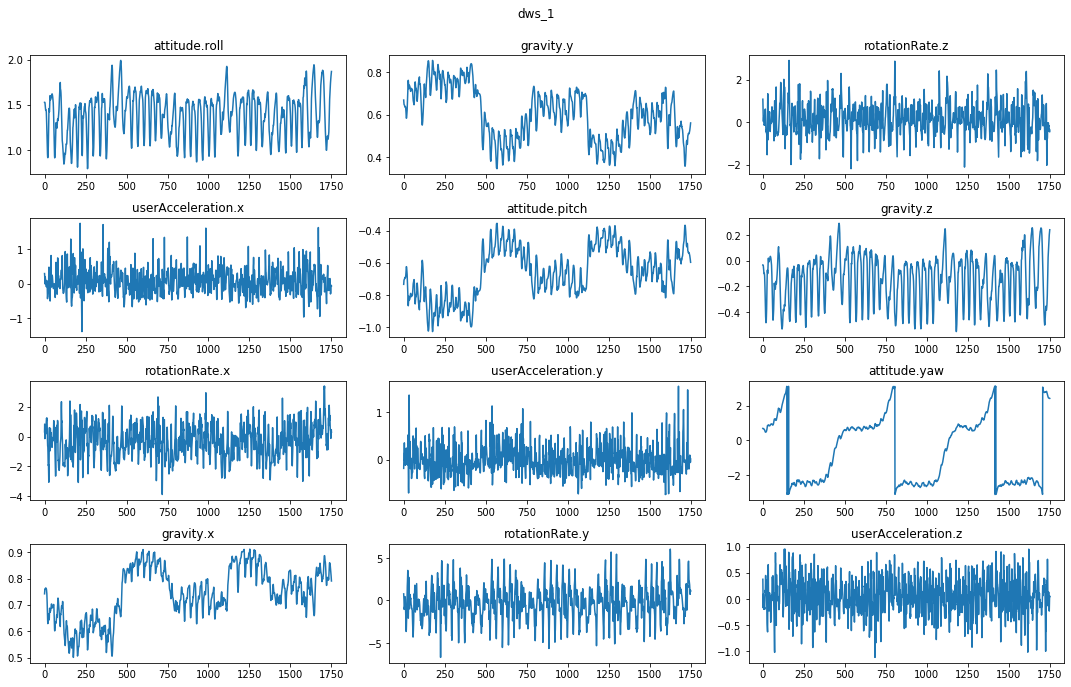

In [16]:
plot_motion(df_mot, 'dws_1')

In [17]:
def plot_all_motions(folders, subject):
    """Esta función visualiza todos los comportamiento para un sujeto"""
    
    for f in folders:
        mot_filename = os.path.join(data_dir, 'motion_data', f, 'sub_{}.csv'.format(subject))
        df_mot = pd.read_csv(mot_filename, index_col=0)
        plot_motion(df_mot, 'Sujeto: {} - Clase: {}'.format(subject, f))

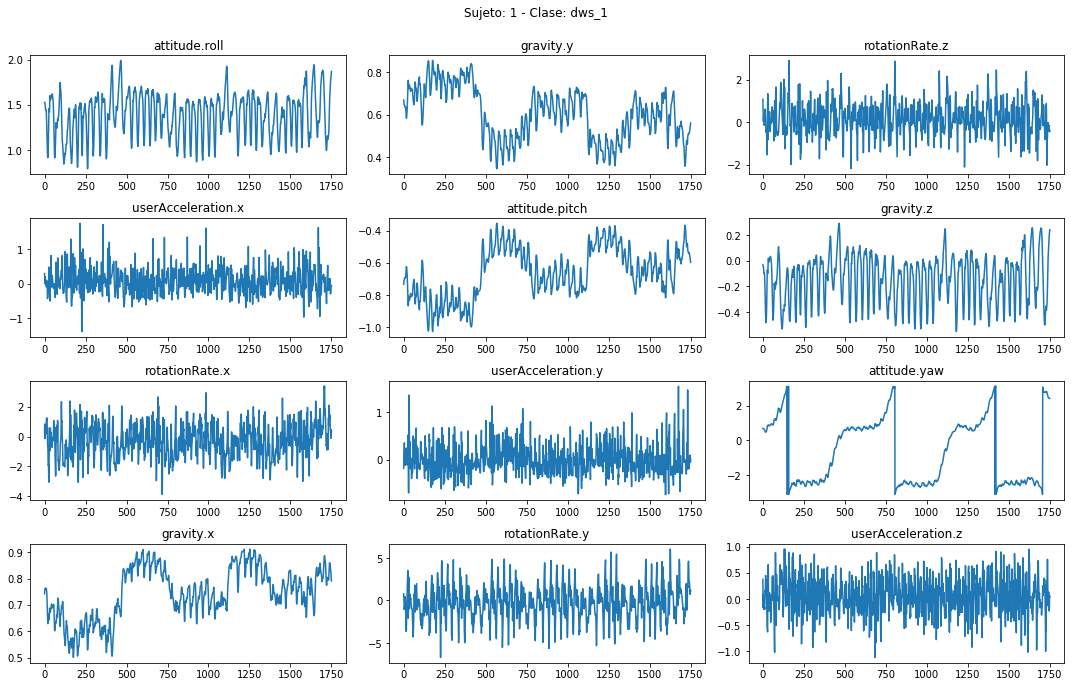

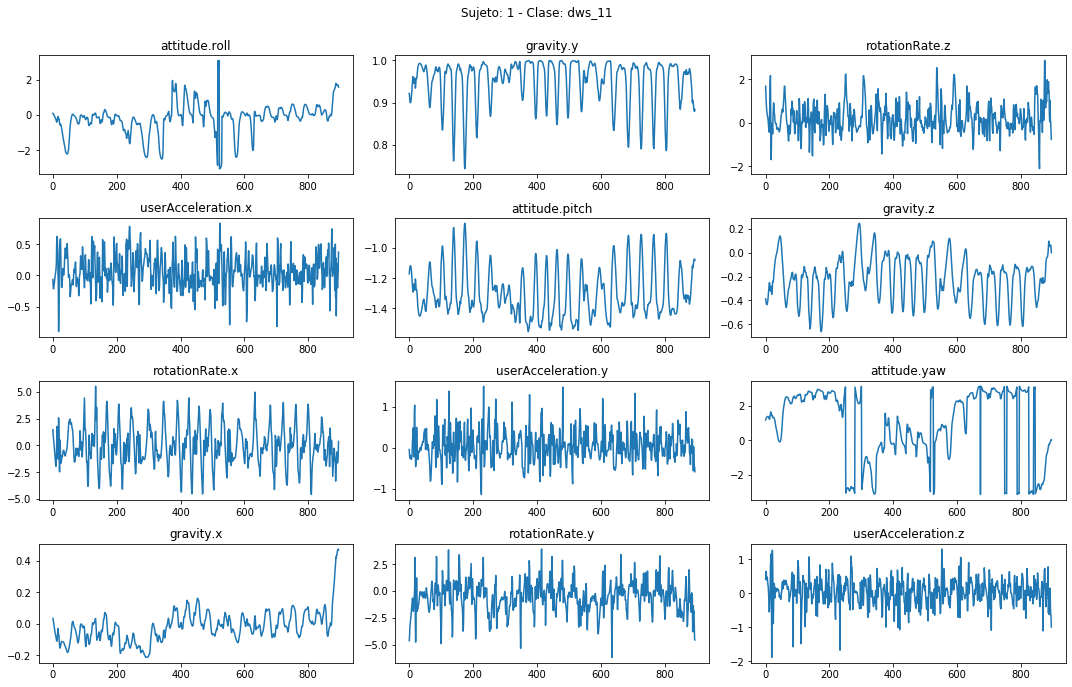

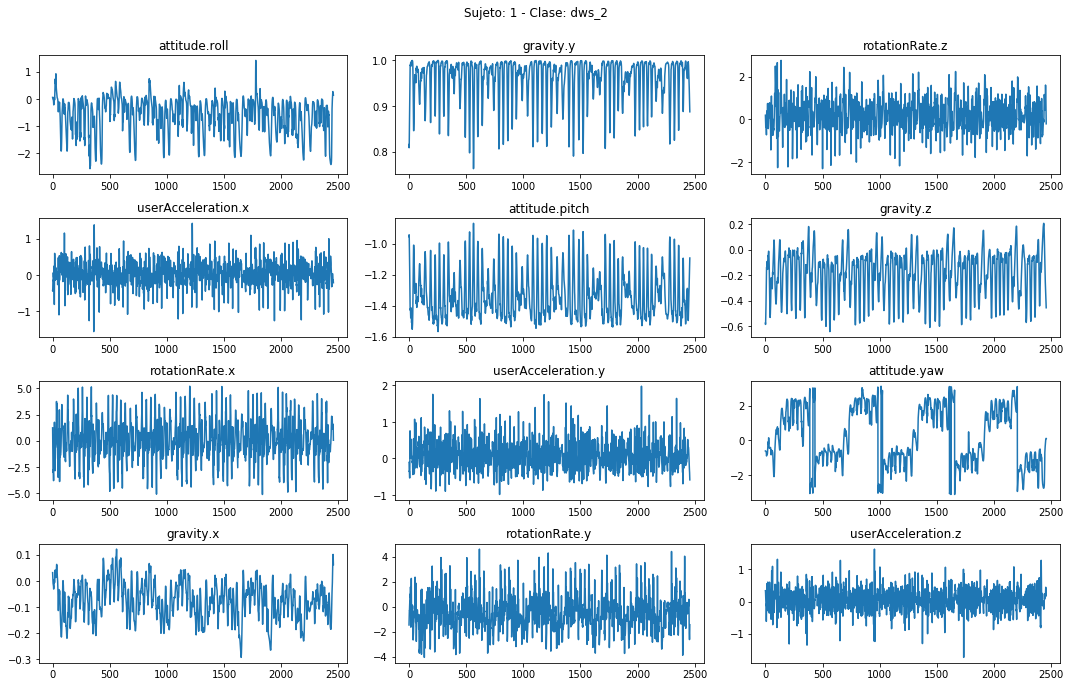

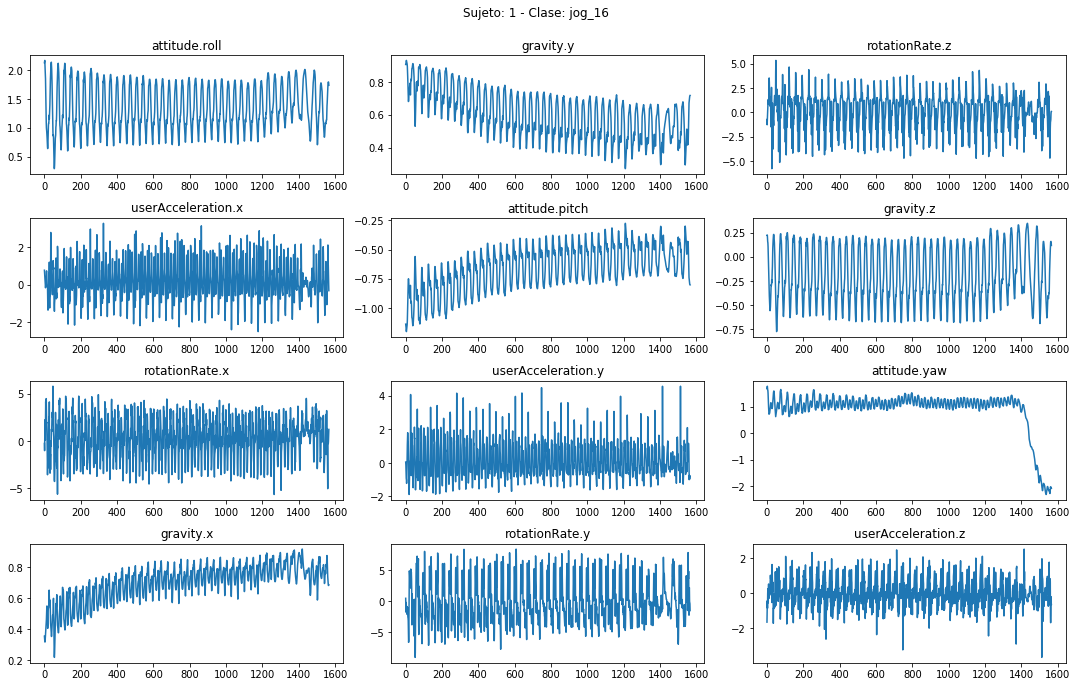

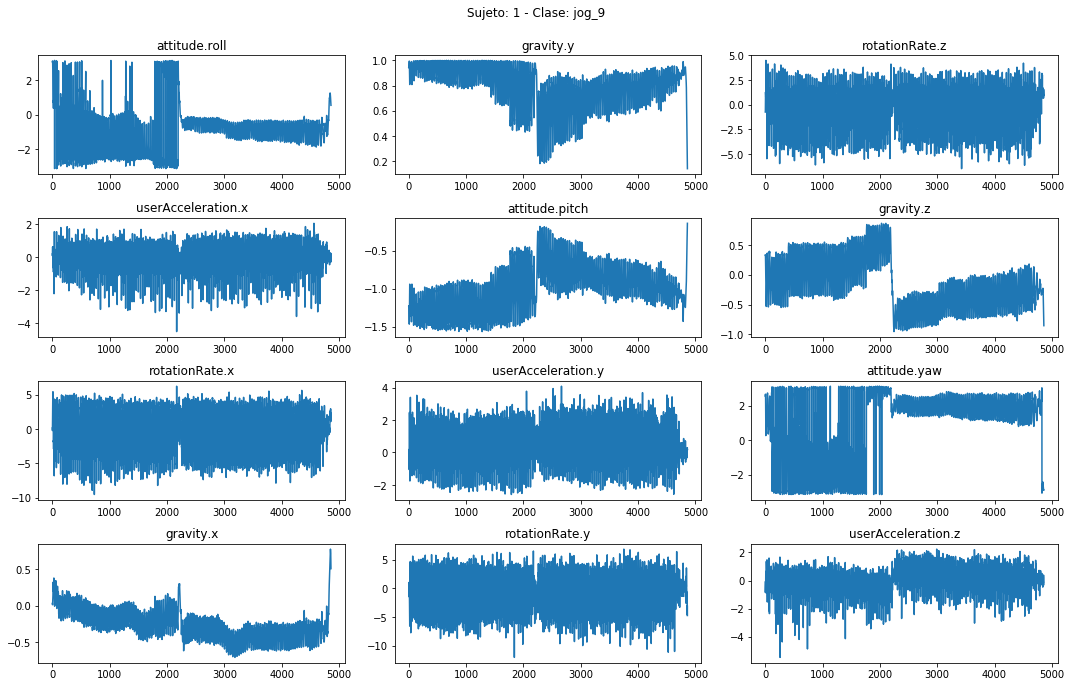

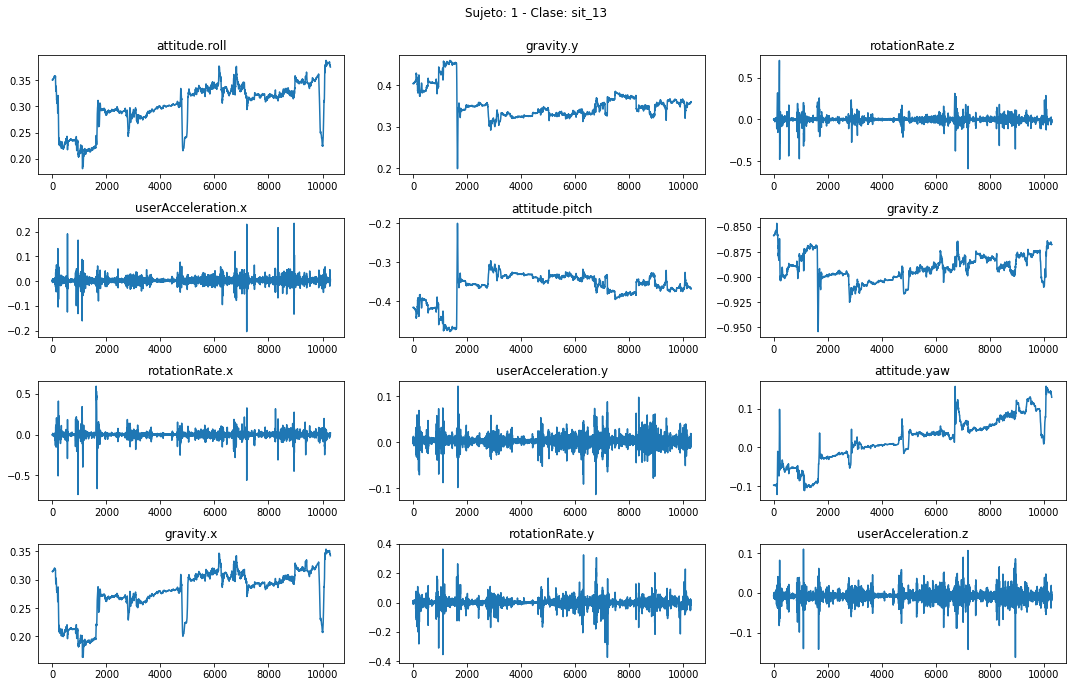

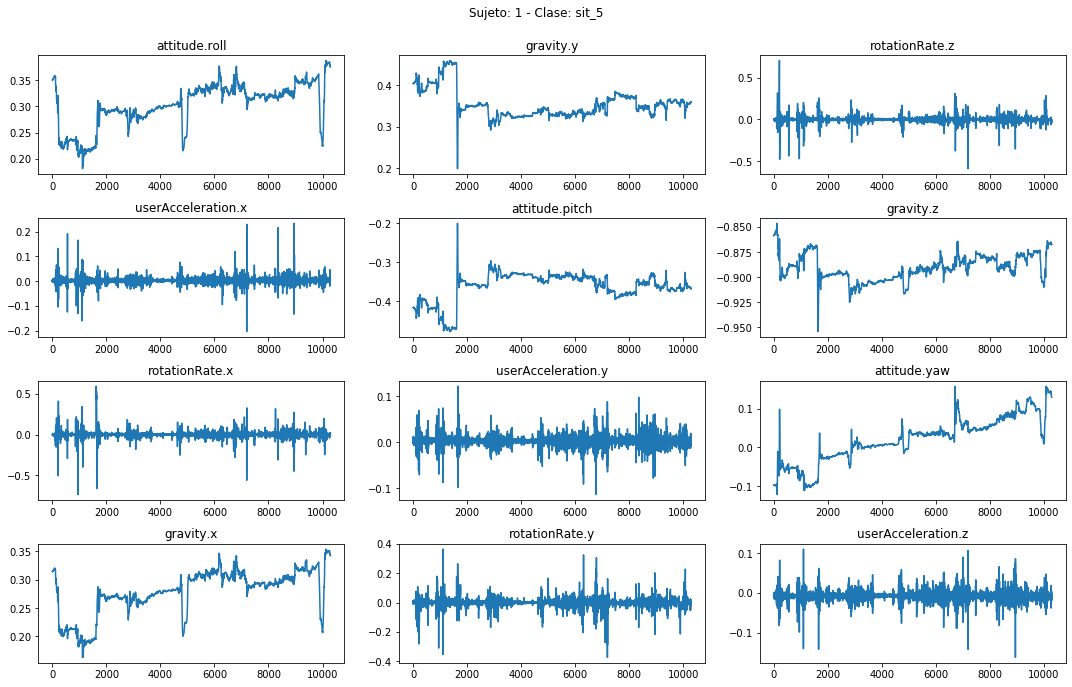

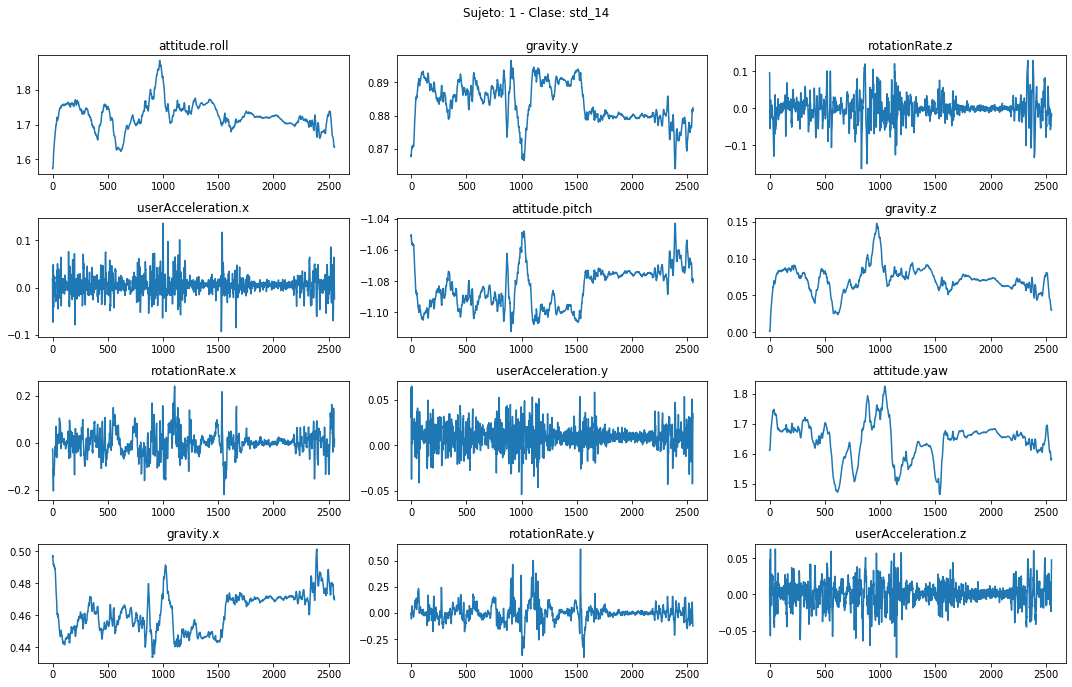

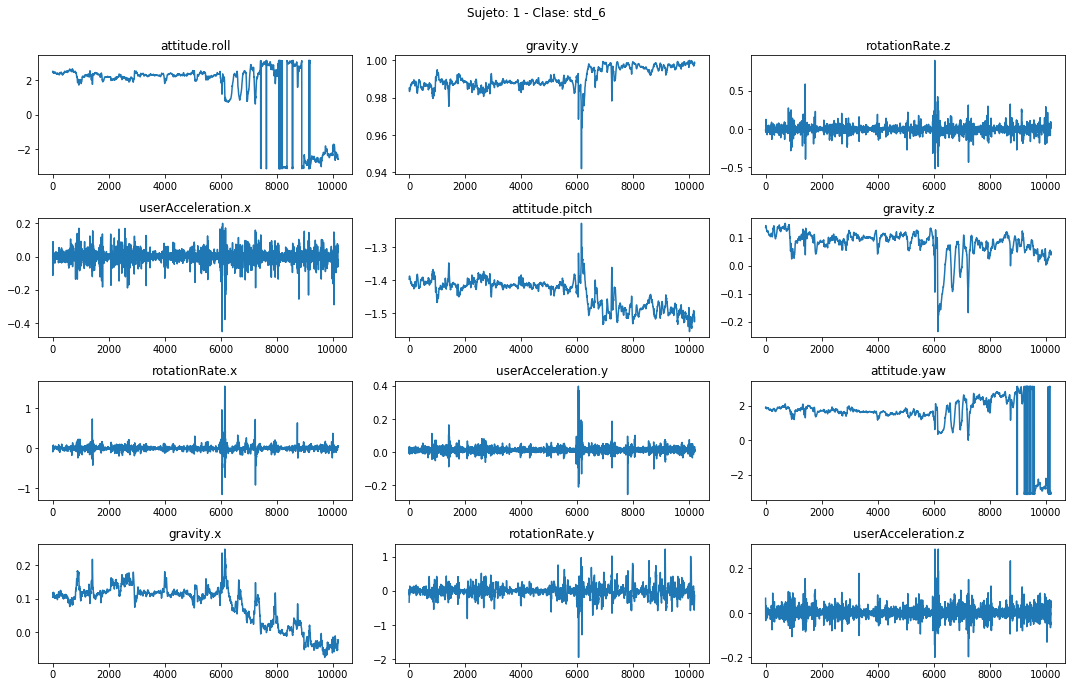

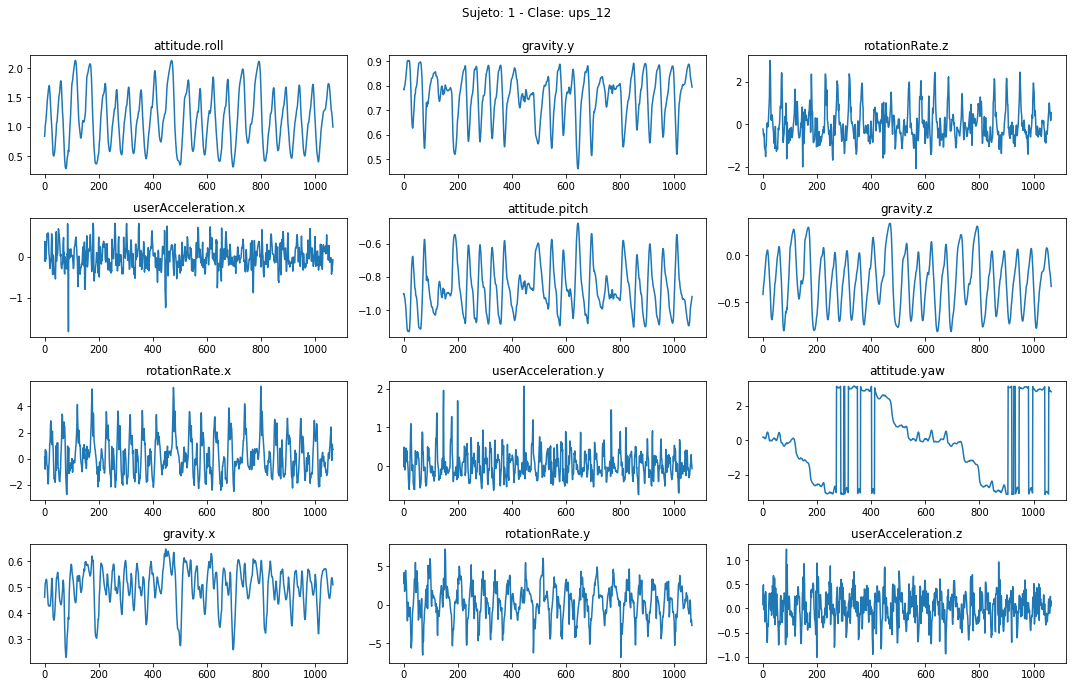

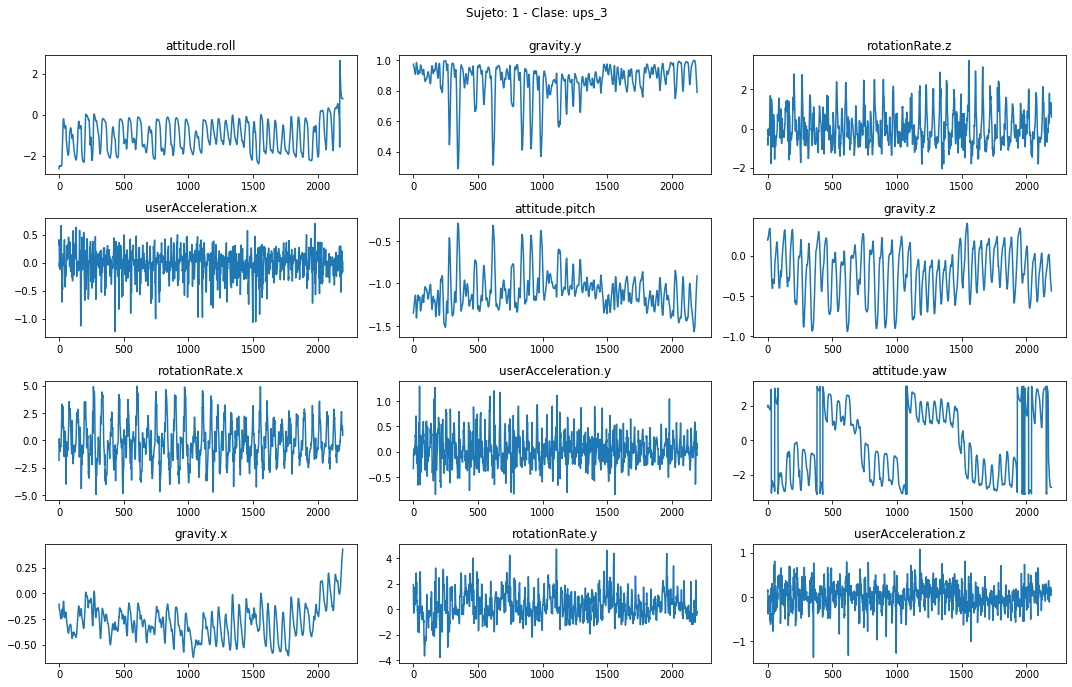

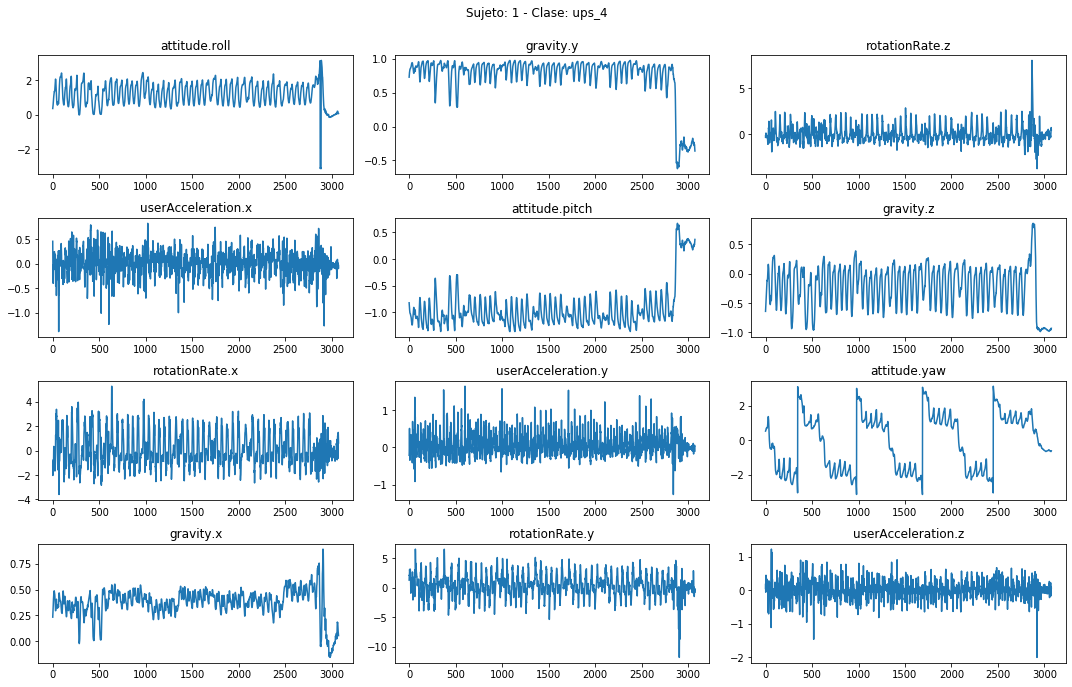

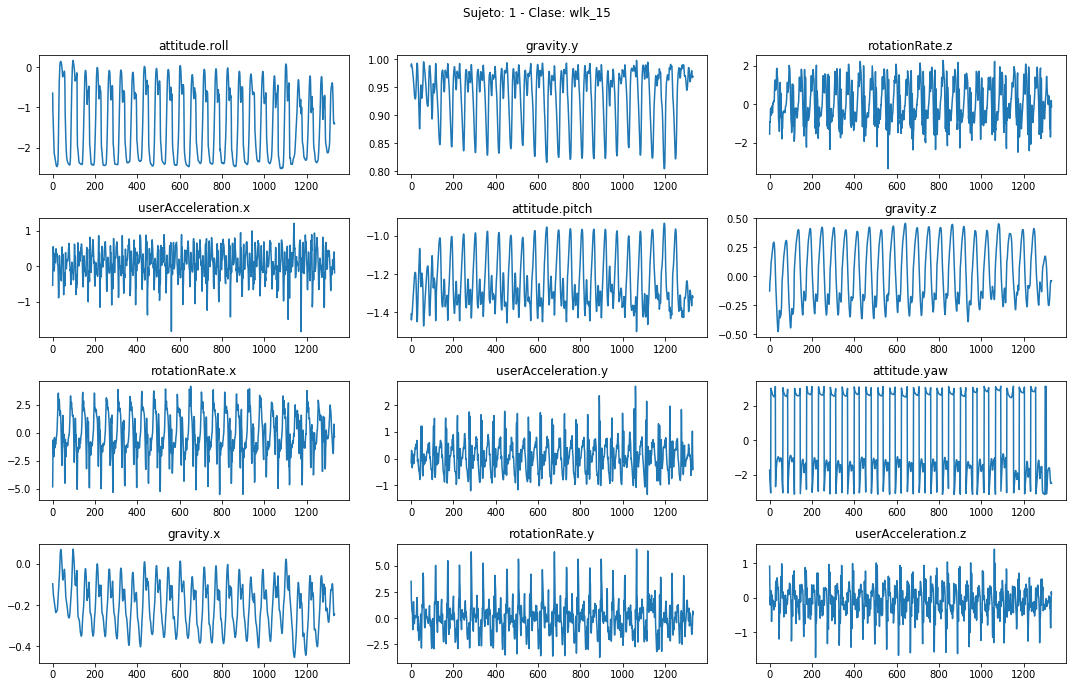

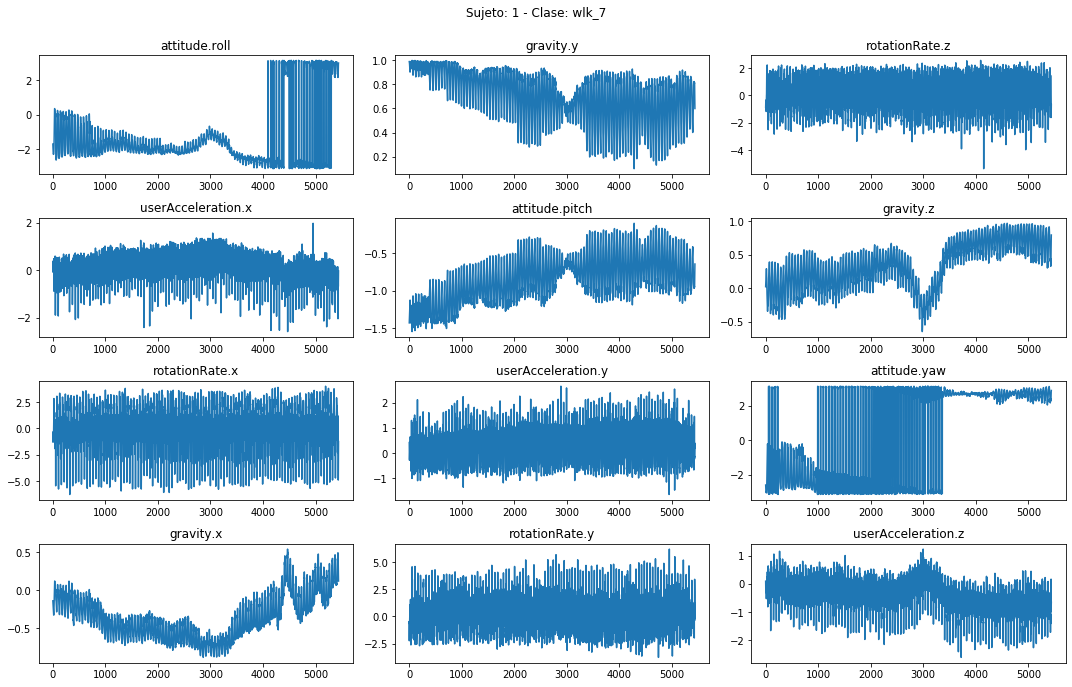

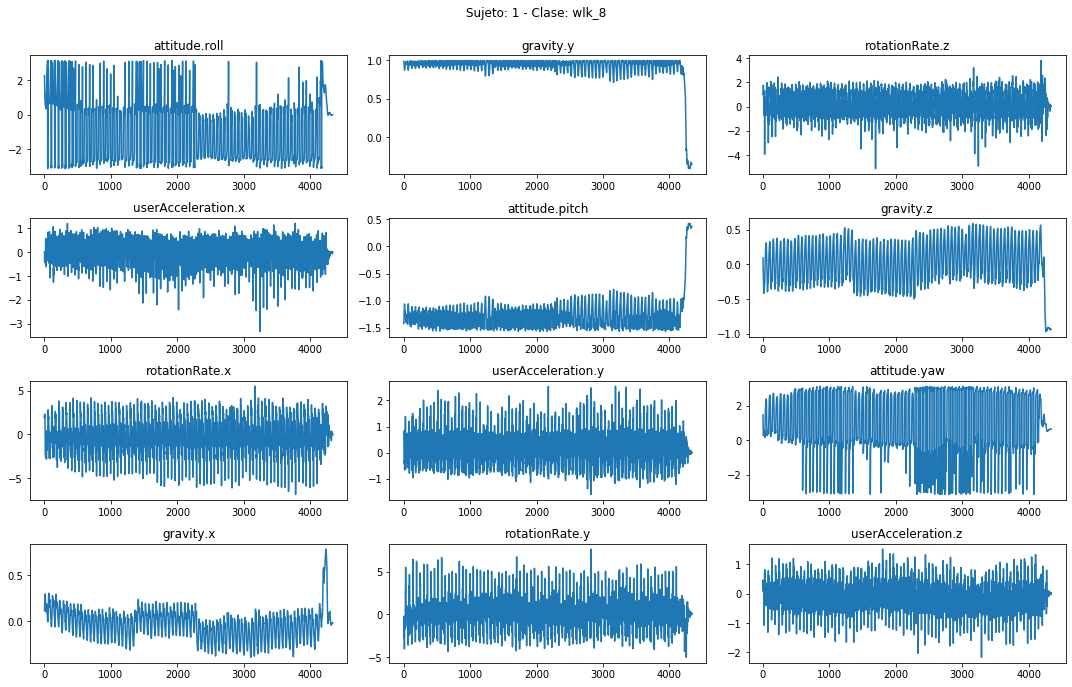

In [18]:
plot_all_motions(dir_list, 1)

# Extracción de Características

En el proceso de extracción de características utilizamos el conocimiento sobre los datos para:
- Transformar los datos en un formato entendible por el clasificador
- Mejorar el rendimiento del clasificador.

In [19]:
features = []
f_name = []

for f in dir_list:

    for u in pd.unique(df['code']).tolist():

        mot_filename = os.path.join(data_dir, 'motion_data', f, 'sub_{}.csv'.format(u))
        df_mot = pd.read_csv(mot_filename, index_col=0)
        c, _ = f.split('_')
        
        feats = []
        feats.extend(df_mot.mean(axis=0).tolist())
        feats.extend(df_mot.std(axis=0).tolist())
        feats.extend(df_mot.median(axis=0).tolist())
        feats.extend(df_mot.skew(axis=0).tolist())
        feats.extend(df_mot.kurtosis(axis=0).tolist())
        feats.extend([classes[c]])

        features.append(feats)

In [20]:
"""Separamos características y targets"""

features = pd.DataFrame(np.array(features))

targets = features[features.columns[-1]]
features = features[features.columns[:-1]]

In [21]:
print(features.shape)

(360, 60)


In [22]:
features.head(5)

0         1         2         3         4         5         6   \
0  1.387143 -0.658759 -0.645835  0.745272  0.604755 -0.141934 -0.313635   
1  0.803698 -1.238190  0.315377  0.164360  0.938075 -0.228186 -0.036648   
2  1.122637 -1.278781 -0.883280  0.231165  0.953609 -0.127939 -0.052527   
3 -1.058740 -1.254867  0.162060 -0.111635  0.939830 -0.067831  0.066531   
4 -2.231510 -1.231143 -0.580882 -0.155962  0.933577  0.238797  0.011575   

         7         8         9   ...        50        51         52        53  \
0 -0.245480  0.141903  0.062493  ... -1.397759 -0.705665  -0.950784 -0.737874   
1 -0.334969  0.113063  0.054399  ... -1.223791 -0.175684   0.603767 -0.196369   
2 -0.334982  0.062300  0.037259  ... -1.022324  0.237698   0.508791  0.432971   
3 -0.374688  0.101141  0.084948  ...  0.242259 -0.508037   1.883493 -0.749140   
4 -0.349338 -0.084188 -0.035430  ... -1.311358  6.995626  21.479412  3.339209   

         54        55        56        57        58        59  
0 -0.218654  0.145040  0.667383  1.408807  1.556987  0.170156  
1 -0.655520  0.175805  2.505341  0.762961  2.319519  3.874420  
2 -0.671666  1.030409 -0.008348  0.943107  0.391602  1.534681  
3 -0.502435  1.331893  0.159356  0.957112  5.672724  2.101708  
4 -0.444525  1.857434  1.065401  1.920788  2.669767  1.992018  

[5 rows x 60 columns]

In [23]:
targets.head(5)

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: 60, dtype: float64

# Eliminación Correlaciones

In [24]:
# Creamos matrix de correlación
corr_matrix = features.corr().abs()

# Seleccionamos el triangulo superior de la matriz de correlación
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Encontramos aquellas columnas cuya correlación es mayor a 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [25]:
to_drop

[4, 24, 25, 27, 28, 29, 40, 52]

In [26]:
# Drop features 
features = features.drop(features[to_drop], axis=1)

In [27]:
features.shape

(360, 52)

# Evaluación del Desempeño y Selección del Modelo

In [28]:
from sklearn.model_selection import train_test_split

# Modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

# Hold-Out

Consiste en dividir la base de datos en una parte para el entrenamiento del modelo y otra parte para la evaluación del rendimiento.

Existen reglas nemotécnicas y proporciones estándares:
- Entrenamiento: 2/3, Evaluación: 1/3
- Entrenamiento: 70%, Evaluación: 30%

In [29]:
x_train, x_test, y_train, y_test = train_test_split(
    features, targets, 
    test_size=0.3, 
    random_state=42,
    shuffle=True
)

In [30]:
print(x_train.shape)

(252, 52)


In [31]:
print(x_test.shape)

(108, 52)


# Entrenamiento de los Modelos

Antes de iniciar el entrenamiento definamos primero una función para visualizar la matriz de confusión.

In [32]:
def plot_confusion_matrix(cm, targets=None, normalize=True, figsize=(7, 6)):
    """Esta función visualiza la matriz de confusión de un clasificador"""
    
    # Calculamos el accuracy para el clasificador
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
        
    df_cm = pd.DataFrame(cm, columns=targets, index=targets)
    df_cm.index.name = 'Clase Real'
    df_cm.columns.name = 'Clase Predicha'

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title('Accuracy: {:0.2f} - Error Rate: {:0.2f}'.format(accuracy, misclass), y=1.05)
    sns.set(font_scale=1.4)  # for label size
    sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 10}, ax=ax)  # font size

Y también de una función para imprimir el rendimiento de cada modelo

In [33]:
def show_precision_recall(y_test, pred, targets):
    """
    Esta función visualiza las métricas de Precisión, Recall y F-Score retornadas
    por la función de sklearn precision_recall_fscore_support().
    
    """
    metrics = ['Precision', 'Recall', 'F-Score', 'Support']
    prf = precision_recall_fscore_support(y_test, pred)
    prf = np.array([np.round(m, 2) for m in prf])
    prf = pd.DataFrame(prf, columns=targets, index=metrics)

    return prf

# Árbol de Decisión

Para este ejemploi, utilizaremos un árbol con una profundidad máxima de $3$. Recordemos generar un árbol muy profundo puede generar la pérdida de generalidad del modelo.

In [34]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dtree.fit(x_train, y_train)

print('Accuracy: {}'.format(dtree.score(x_test, y_test)))

Accuracy: 0.9259259259259259


In [35]:
# Generamos las predicciones en el conjunto de evaluación
pred = dtree.predict(x_test)

# Revisamos las primeras cinco predicciones 
pred[:5]

array([5., 1., 5., 6., 5.])

In [37]:
# Visualizamos la matriz de confusión directamente de la función que provee Scikit-Learn.
tt = list(classes.keys())
pd.DataFrame(confusion_matrix(pred, y_test), columns=tt, index=tt)

dws  jog  sit  std  ups  wlk
dws   20    1    0    0    3    0
jog    0   16    0    0    0    0
sit    0    0   13    0    0    0
std    0    0    0   13    0    0
ups    1    0    0    0   15    0
wlk    1    2    0    0    0   23

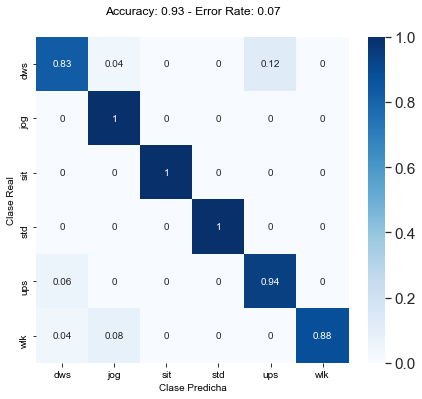

In [38]:
plot_confusion_matrix(confusion_matrix(pred, y_test), targets=tt)

También podemos imprimir las métricas de Precision, Recall y F-Score para el clasificador.

In [39]:
show_precision_recall(y_test, pred, targets=tt)

dws    jog   sit   std    ups    wlk
Precision   0.83   1.00   1.0   1.0   0.94   0.88
Recall      0.91   0.84   1.0   1.0   0.83   1.00
F-Score     0.87   0.91   1.0   1.0   0.88   0.94
Support    22.00  19.00  13.0  13.0  18.00  23.00

Una de las características de los Árboles es que es posible entender e interpretar el modelo. Usaremos la función ```export_tree``` para imprimir el árbol generado.

In [40]:
from sklearn.tree.export import export_text
r = export_text(dtree)
print(r)

|--- feature_20 <= 0.09
|   |--- feature_1 <= -1.02
|   |   |--- class: 4.0
|   |--- feature_1 >  -1.02
|   |   |--- feature_29 <= -0.03
|   |   |   |--- class: 4.0
|   |   |--- feature_29 >  -0.03
|   |   |   |--- class: 3.0
|--- feature_20 >  0.09
|   |--- feature_6 <= 0.22
|   |   |--- feature_6 <= -0.21
|   |   |   |--- class: 1.0
|   |   |--- feature_6 >  -0.21
|   |   |   |--- feature_21 <= 0.84
|   |   |   |   |--- class: 6.0
|   |   |   |--- feature_21 >  0.84
|   |   |   |   |--- feature_41 <= -1.46
|   |   |   |   |   |--- class: 6.0
|   |   |   |   |--- feature_41 >  -1.46
|   |   |   |   |   |--- class: 2.0
|   |--- feature_6 >  0.22
|   |   |--- feature_12 <= 0.07
|   |   |   |--- class: 1.0
|   |   |--- feature_12 >  0.07
|   |   |   |--- class: 5.0



También podemos visualizar el árbol mediante la función ```plot_tree()```

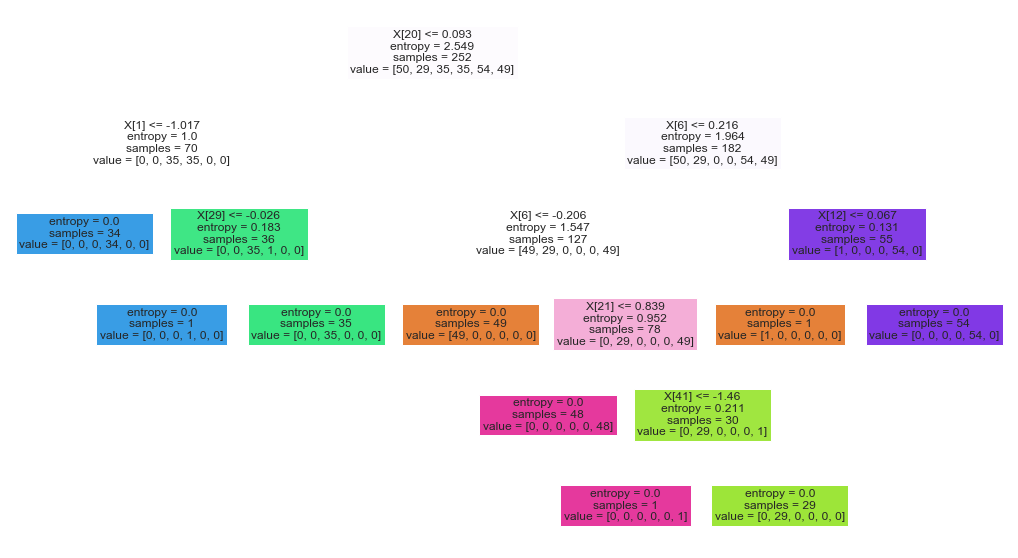

In [41]:
"""Generamos una nueva figura y graficamos el árbol generado."""
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
plot_tree(dtree, fontsize=12, filled=True, ax=ax);

# K-NN

Algunas consideraciones:

- Para un clasificador K-NN los atributos deben ser reales, es decir, $X \in R^{m,n}$, donde: ```m``` es el número de filas de los datos y ```n``` es el número de atributos de los datos.
    
- También, debemos considerar escalar los atributos para remover el efecto de las magnitudes en cada dimensión

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()  # Creamos una instancia del escalador
scaler.fit(x_train)  # Calculamos la media y desviación estándar

x_train_sc = scaler.transform(x_train) # Transformamos los datos de entrenamiento

Creamos una instancia del clasificador K-NN y "entrenamos" el clasificador.

In [45]:
knn = KNeighborsClassifier(n_neighbors=3, algorithm='auto', n_jobs=2)
knn.fit(x_train_sc, y_train) 

# Obtenemos el accuracy del modelo en el set de validación
print(knn.score(scaler.transform(x_test), y_test))

0.9259259259259259


Generamos predicciones con el modelo K-NN. Cuando escalamos los atributos de entrenamiento debemos usar el **mismo escalamiento** en los atributos para validación.

In [46]:
pred = knn.predict(scaler.transform(x_test))

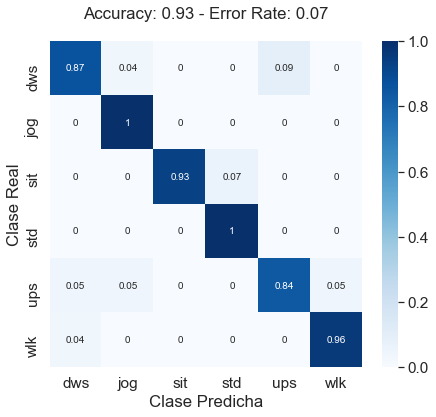

In [48]:
plot_confusion_matrix(confusion_matrix(pred, y_test), targets=tt)

# Naive Bayes

Existen tres versiones para:
- Datos continuos asumiendo distribución normal de los atributos
- Datos discretos asumiendo la frecuencia relativa de los atributos
- Datos binarios asumiendo que cada dato es 1 cuando el atributo está presente


In [49]:
nb = GaussianNB()
nb.fit(x_train, y_train)

print(nb.score(x_test, y_test))

0.9259259259259259


In [50]:
pred = nb.predict(x_test)

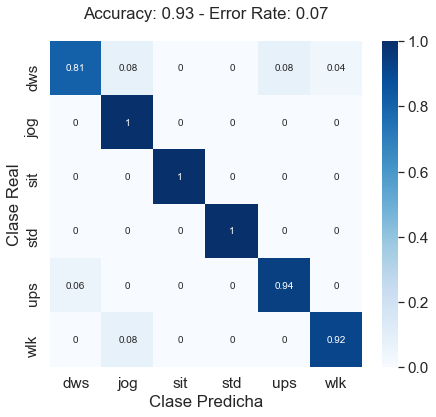

In [52]:
plot_confusion_matrix(confusion_matrix(pred, y_test), targets=tt)

# Random Forest

Por defecto en Scikit-Learn, el muestreo tiene la misma dimensión que los datos de entrada. Es muestreo con reemplazo.

In [53]:
rf = RandomForestClassifier(n_estimators=30, max_depth=2, random_state=0, criterion='entropy')
rf.fit(x_train, y_train)

print(rf.score(x_test, y_test))

0.8518518518518519


In [54]:
pred = rf.predict(x_test)

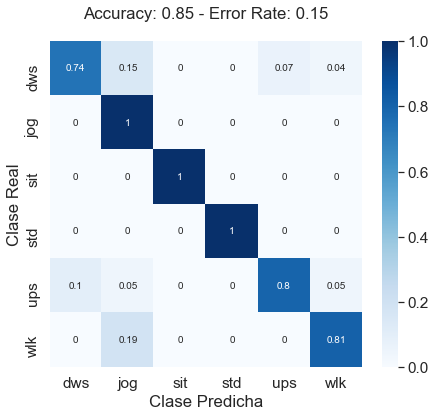

In [55]:
plot_confusion_matrix(confusion_matrix(pred, y_test), targets=tt)

# Features importance

En un Random Forest podemos visualizar la importancia relativa de los atributos.

In [57]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

In [58]:
"""Listado de las 10 características más importantes"""
for f in range(10):
    print("{} caracterísitcas {} ({})".format(f + 1, indices[f], importances[indices[f]]))

1 caracterísitcas 18 (0.12197905954950058)
2 caracterísitcas 22 (0.11289419164854085)
3 caracterísitcas 19 (0.08856327624451893)
4 caracterísitcas 17 (0.0769550974447149)
5 caracterísitcas 21 (0.07273029105274922)
6 caracterísitcas 46 (0.06579247156364547)
7 caracterísitcas 20 (0.0641070340692377)
8 caracterísitcas 25 (0.06278054777116117)
9 caracterísitcas 13 (0.061577168501159865)
10 caracterísitcas 6 (0.05618043903204632)


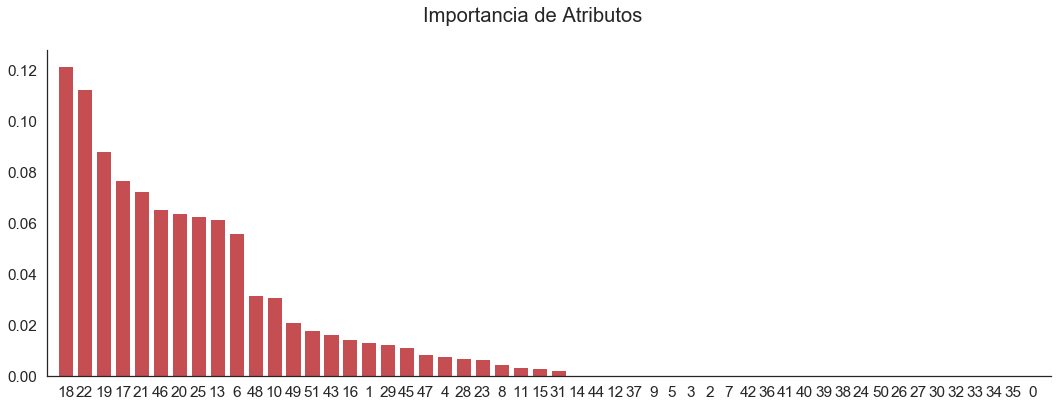

In [59]:
"""Visualización del ranking de características"""
with sns.axes_style('white'):
    plt.figure(figsize=(18, 6))
    plt.suptitle("Importancia de Atributos")
    plt.bar(range(x_train.shape[1]), importances[indices], color="r", align="center")
    plt.xticks(range(x_train.shape[1]), indices)
    plt.xlim([-1, x_train.shape[1]])

sns.despine()

# K-Fold Cross Validation

En esta sección revisaremos el uso de validación cruzada para la evaluación del rendimiento de los clasificadores y selección de modelo.

In [60]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline

In [61]:
n_folds = 5

In [62]:
scores = cross_val_score(knn, x_train, y_train, cv=n_folds, scoring='accuracy')

print('Accuracy: {:0.2f} +/- {:0.2f}'.format(scores.mean(), scores.std() * 2))

Accuracy: 0.72 +/- 0.20


Validación considerando el escalamiento. Incluimos el clasificador en un ```pipeline``` junto con el escalarado. Esto nos permite obtener el comportamiento de escalar también el conjunto de validación.

In [63]:
clf = make_pipeline(StandardScaler(), knn)
scores = cross_val_score(clf, x_train, y_train, cv=n_folds, scoring='f1_micro')

print('Accuracy: {:0.2f} +/- {:0.2f}'.format(scores.mean(), scores.std() * 2))

Accuracy: 0.94 +/- 0.04


- La función ```cross_val_score()``` realizar la validación cruzada utilizando una métrica única seleccionada a través del parámetro ```scoring```.

- A diferencia, la función ```cross_validate()``` permite la evaluación y cálculo de múltiples métricas de rendimiento.

In [64]:
scores = cross_validate(
    dtree, x_train, y_train, 
    cv=n_folds,
    scoring={'accuracy','f1_macro', 'f1_micro', 'f1_weighted'},
    n_jobs=2
)

In [65]:
scores

{'fit_time': array([0.00799632, 0.00799632, 0.0089972 , 0.00899935, 0.00799465]),
 'score_time': array([0.00500345, 0.00600338, 0.00500345, 0.00500178, 0.0050056 ]),
 'test_f1_micro': array([0.96078431, 0.98039216, 1.        , 0.98039216, 1.        ]),
 'test_accuracy': array([0.96078431, 0.98039216, 1.        , 0.98039216, 1.        ]),
 'test_f1_macro': array([0.96089367, 0.97606838, 1.        , 0.97606838, 1.        ]),
 'test_f1_weighted': array([0.96027016, 0.9802916 , 1.        , 0.9802916 , 1.        ])}

Podemos también hacer validación cruzada usando elperador KFold como iterador.

In [66]:
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, random_state=0, shuffle=False)  # Activamos shuffle
# skf = KFold(n_splits=n_folds, random_state=0)  # Activamos shuffle
scaler = StandardScaler()

In [67]:
for i, (train_id, test_id) in enumerate(skf.split(X=features, y=targets)):
    
    x_train, y_train = features.iloc[train_id, :], targets.iloc[train_id]
    x_test, y_test = features.iloc[test_id, :], targets.iloc[test_id]

    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    clf = KNeighborsClassifier(n_neighbors=3, algorithm='auto', n_jobs=2)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    
    scores = show_precision_recall(pred, y_test, targets=tt)
    print('Fold: {}'.format(i+1))
    print(scores)
    print()

Fold: 1
            dws   jog    sit   std    ups    wlk
Precision   1.0  0.80   1.00  0.90   1.00   0.87
Recall      1.0  0.89   0.91  1.00   0.88   0.93
F-Score     1.0  0.84   0.95  0.95   0.94   0.90
Support    15.0  9.00  11.00  9.00  17.00  14.00

Fold: 2
             dws   jog   sit   std   ups   wlk
Precision   1.00   1.0  0.90   0.9   1.0   1.0
Recall      0.94   1.0  1.00   0.9   1.0   1.0
F-Score     0.97   1.0  0.95   0.9   1.0   1.0
Support    16.00  10.0  9.00  10.0  15.0  15.0

Fold: 3
             dws   jog   sit   std    ups    wlk
Precision   1.00   0.9   1.0  0.90   0.86   0.93
Recall      0.82   0.9   1.0  1.00   0.92   1.00
F-Score     0.90   0.9   1.0  0.95   0.89   0.96
Support    17.00  10.0  10.0  9.00  13.00  13.00

Fold: 4
             dws  jog  sit  std    ups    wlk
Precision   0.93  1.0  1.0  1.0   1.00   0.86
Recall      1.00  1.0  1.0  1.0   0.82   1.00
F-Score     0.96  1.0  1.0  1.0   0.90   0.92
Support    13.00  9.0  9.0  9.0  17.00  12.00

Fold: 5
 

In [68]:
def plot_cv_indices(cv, X, y, ax, n_splits, lw=10):
    """
    Crea un gráfico con los índices de la validación cruzada.
    
    """
    cmap_data = plt.cm.Paired
    cmap_cv = plt.cm.coolwarm
    
    # Genera la visualización para entrenamiento/validación para cada partición de la VC
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):

        # Llena los indices con los grupos de entrenamiento y test
        indices = np.array([np.nan] * X.shape[0])
        indices[tt] = 1
        indices[tr] = 0

        # Visualiza los resultados
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Grafica las clases
    ax.scatter(range(len(X)), [ii + 1.5] * len(X), c=y, marker='_', lw=lw, cmap=cmap_data)

    # Da formato al gráfico
    yticklabels = list(range(n_splits)) + ['Clase']#, 'group']
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Índice de Muestras', ylabel="Iteración CV",
           ylim=[n_splits+2.2, -.2]
          )
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)

    return ax

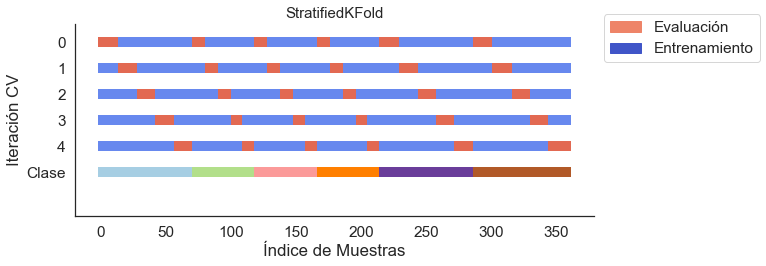

In [69]:
from matplotlib.patches import Patch
cmap_cv = plt.cm.coolwarm

with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(12, 4))
    ax = plot_cv_indices(skf, features, targets, ax=ax, n_splits=n_folds)
    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Evaluación', 'Entrenamiento'], loc=(1.02, .8))
    # Ajusta la leyenda
    plt.tight_layout()
    fig.subplots_adjust(right=.7)
sns.despine()